In [258]:

# ## Import Libraries
# All libraries are used for specific tasks including data preprocessing, visualization, transformation and evaluation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
import warnings
warnings.filterwarnings("ignore")

In [259]:
# ## Import Data
# ### Read Training Data
# The training set is read locally and the **head** function is used to display the data for intial understanding

# "======Data understanding======"



import pandas as pd

dataTrain = pd.read_excel(r'C:\Users\Downloads/Bike_Price_Train.xlsx')
dataTrain = dataTrain.rename(columns = {'CC(Cubic capacity)' : 'Cubic_Capacity'}) 
dataTrain.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,Cubic_Capacity,Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [260]:


type(dataTrain)  #data type


pandas.core.frame.DataFrame

In [261]:
# The **shape** function displays the number of rows and columns in the training set



dataTrain.shape # check dimension

(220, 10)

In [262]:
dataTest = pd.read_excel(r'C:\Users\Downloads/Bike_Price_Test.xlsx')
dataTest = dataTest.rename(columns = {'CC(Cubic capacity)' : 'Cubic_Capacity'}) 

dataTest.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,Cubic_Capacity,Fuel_Capacity,Price
0,1,Suzuki,Gixer RC,2020,5,V-twin,Petrol,200CC,19 Litres,97999
1,2,Royal Enfield,Bullet,2012,2,V-twin,Petrol,270CC,20 Litres,195999
2,3,Yamaha,FZ-S-400,2020,8,Boxer,Petrol,400CC,20 Litres,190000
3,4,KTM,Duke 360T,2020,10,Boxer,Petrol,360CC,20 Litres,199999
4,5,Mahindra,Maza,2020,10,Boxer,Petrol,225CC,17 Litres,155000


In [263]:
# The **shape** function displays the number of rows and columns in the testing set



dataTest.shape

(88, 10)

In [264]:
# Checking for null values in each column and displaying the sum of all null values in each column (Training Set)



dataTrain.isnull().sum()

S.no                 0
Bike_company         0
Bike_model           0
Manufactured_year    0
Engine_warranty      2
Engine_type          0
Fuel_type            0
Cubic_Capacity       0
Fuel_Capacity        1
Price                0
dtype: int64

In [265]:
# Checking for null values in each column and displaying the sum of all null values in each column (Testing Set)



dataTest.isnull().sum()

S.no                 0
Bike_company         0
Bike_model           0
Manufactured_year    0
Engine_warranty      0
Engine_type          0
Fuel_type            0
Cubic_Capacity       0
Fuel_Capacity        0
Price                0
dtype: int64

In [267]:
# Checking if null values are eliminated (Training set)



dataTrain.isnull().sum()

S.no                 0
Bike_company         0
Bike_model           0
Manufactured_year    0
Engine_warranty      2
Engine_type          0
Fuel_type            0
Cubic_Capacity       0
Fuel_Capacity        1
Price                0
dtype: int64

In [268]:


dataTrain.shape 

(220, 10)

In [269]:
# Checking if null values are eliminated (Testing set)



dataTest.isnull().sum()  

S.no                 0
Bike_company         0
Bike_model           0
Manufactured_year    0
Engine_warranty      0
Engine_type          0
Fuel_type            0
Cubic_Capacity       0
Fuel_Capacity        0
Price                0
dtype: int64

In [270]:


dataTest.shape  # 5 rows removed


(88, 10)

In [271]:
# Checking the data types to see if all the data is in correct format. All the data seems to be in their required format.



dataTrain.dtypes  # checking the data type of every column

S.no                   int64
Bike_company          object
Bike_model            object
Manufactured_year      int64
Engine_warranty      float64
Engine_type           object
Fuel_type             object
Cubic_Capacity        object
Fuel_Capacity         object
Price                  int64
dtype: object

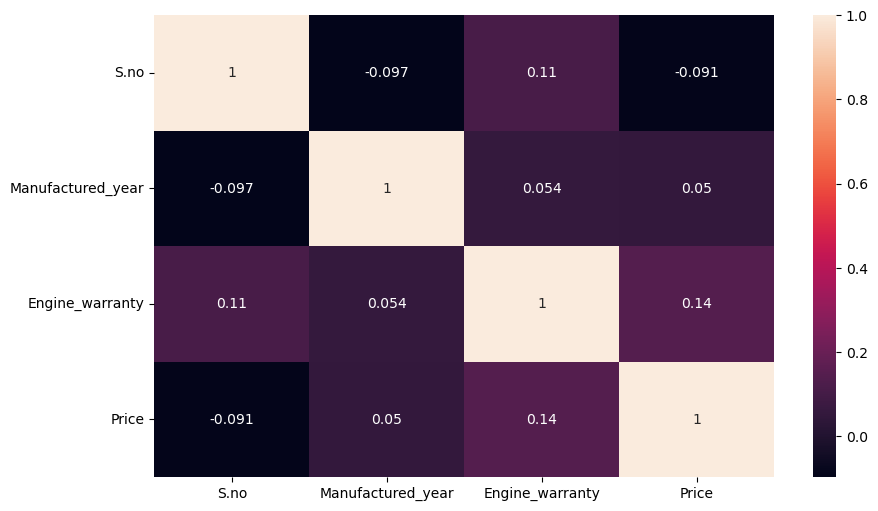

In [272]:
# ## EDA (Exploratory Data Analysis)
# Visualizations are used to understand the relationship between the target variable and the features, in addition to correlation coefficient and p-value. 
# The visuals include heatmap, scatterplot,boxplot etc.
# 

# # Heat map



import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = dataTrain.corr()  
##This is a pandas DataFrame method that is used to calculate the correlation between variables in the DataFrame.
sns.heatmap(corr,annot=True)
plt.show()

In [273]:
# From the heatmap, it is observed that 'year_produced' is the best feature among all the features with numerical data


dataTrain.describe()  #generate various summary statistics of a DataFrame 
#Note: Only features with numeric data are considered

,S.no,Manufactured_year,Engine_warranty,Price
count,220.000000,220.000000,218.000000,2.200000e+02
mean,110.495455,2007.672727,5.646789,2.198306e+05
std,63.655286,123.873931,3.912524,2.403894e+05
min,1.000000,202.000000,2.000000,5.480000e+04
25%,55.750000,2016.000000,4.000000,7.400000e+04
50%,110.500000,2018.000000,5.000000,1.010000e+05
75%,165.250000,2020.000000,6.000000,2.512500e+05
max,220.000000,2050.000000,50.000000,1.234500e+06


In [274]:

# A descriptive analysis to check incorrect entries and anormalies. This is also used to give an overview of the numerical data. It is observed that most of the data has no incorrect entries.

# 1. Count: The number of values in the dataframe.
# 2. Mean: The arithmetic mean or average of the values.
# 3. Standard Deviation (std): A measure of the dispersion or spread of the values.
# 4. Minimum: The minimum (smallest) value in each column.
# 5. 25th Percentile (25%): The value below which 25% of the data falls (1st quartile). Means 25% of the entire data falls under the value 158000 for odometer_value
# 6. 50th Percentile (50%): The median or value below which 50% of the data falls (2nd quartile).
# 7. 75th Percentile (75%): The value below which 75% of the data falls (3rd quartile).
# 8. Maximum: The maximum (largest) value in the Series.

# **************************************************************

# #Looking at the "minimum price", 1 USD is found.
# #This could be a wrong entry (or an outlier)



#Search for price = 1 , if so, change the price to 500
dataTrain.loc[dataTrain['Price'] == 1, 'Price'] = 500 

In [275]:

dataTrain.describe()


,S.no,Manufactured_year,Engine_warranty,Price
count,220.000000,220.000000,218.000000,2.200000e+02
mean,110.495455,2007.672727,5.646789,2.198306e+05
std,63.655286,123.873931,3.912524,2.403894e+05
min,1.000000,202.000000,2.000000,5.480000e+04
25%,55.750000,2016.000000,4.000000,7.400000e+04
50%,110.500000,2018.000000,5.000000,1.010000e+05
75%,165.250000,2020.000000,6.000000,2.512500e+05
max,220.000000,2050.000000,50.000000,1.234500e+06


In [276]:
#Search for price < 500 , if so, change the price to 500
dataTrain.loc[dataTrain['Price'] < 500, 'Price'] = 500

In [277]:


dataTrain.describe()  

,S.no,Manufactured_year,Engine_warranty,Price
count,220.000000,220.000000,218.000000,2.200000e+02
mean,110.495455,2007.672727,5.646789,2.198306e+05
std,63.655286,123.873931,3.912524,2.403894e+05
min,1.000000,202.000000,2.000000,5.480000e+04
25%,55.750000,2016.000000,4.000000,7.400000e+04
50%,110.500000,2018.000000,5.000000,1.010000e+05
75%,165.250000,2020.000000,6.000000,2.512500e+05
max,220.000000,2050.000000,50.000000,1.234500e+06


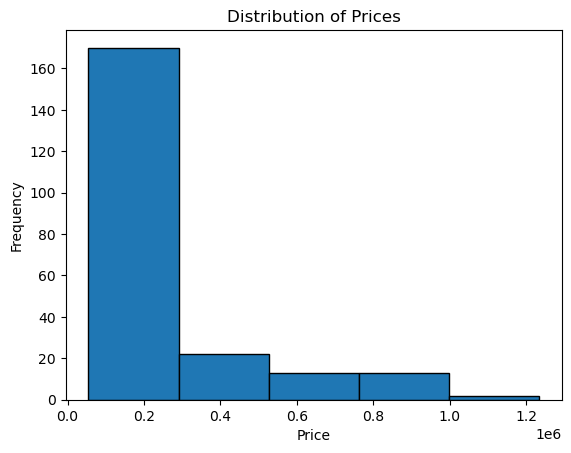

In [278]:
# Find the distribution of the price in the entire dataset
# using "bins"  -- Technique applied is called data binning



import matplotlib.pyplot as plt

dataTrain['Price'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [279]:
# From the histogram, it is understood that majority of the car samples are of lower prices


dataTrain.describe(include = 'object') #summary statistics for categorical values


,Bike_company,Bike_model,Engine_type,Fuel_type,Cubic_Capacity,Fuel_Capacity
count,220,220,220,220,220,219
unique,17,155,4,2,61,27
top,Suzuki,Bullet,V-twin,Petrol,150CC,Battery
freq,19,5,77,183,23,34


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U11'), dtype('float64')) -> None

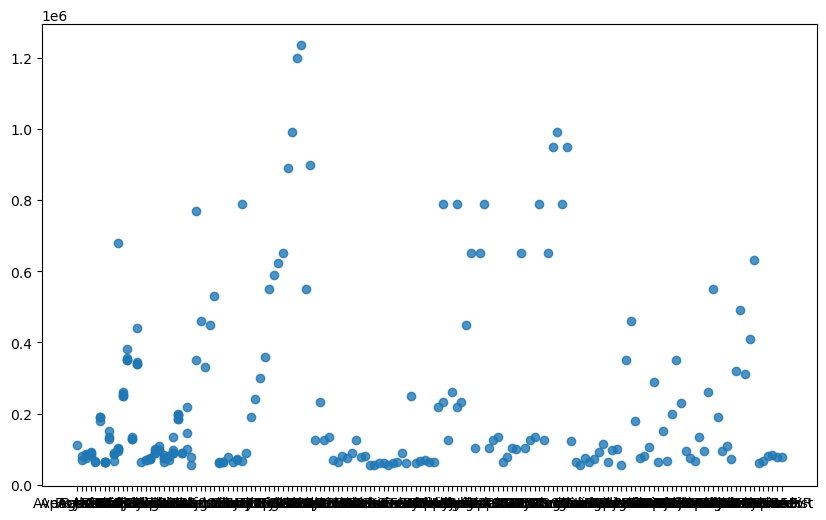

In [280]:
# ### Regression/scatter Plot
# This regression plot show the relation between **Bike_model** and **price**. A slight negative correlation is observed
# whaich shows that price is being affected by the change in odometer value.



import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Bike_model", y="Price", data=dataTrain)
plt.show()

In [281]:
# As observed in the plot, a **negative correlation** is observed

label_encoder = LabelEncoder()
dataTrain['Bike_model'] = label_encoder.fit_transform(dataTrain['Bike_model'])


from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Bike_model'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.002988923264061555  with a P-value of P = 0.9648402826916168


<Axes: xlabel='Manufactured_year', ylabel='Price'>

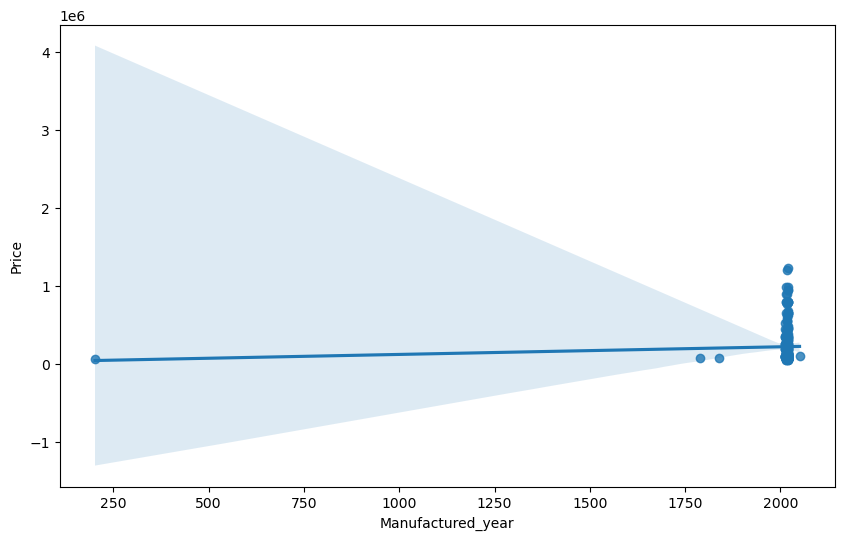

In [282]:
plt.figure(figsize=(10,6))
sns.regplot(x="Manufactured_year", y="Price", data=dataTrain)


In [283]:
# As observed above, a high positive correlation of 0.7 is calculated along with the p-value of 0. This indicates that the correlation between the variables is significant hence year produced feature can be used for prediction.



pearson_coef, p_value = stats.pearsonr(dataTrain['Manufactured_year'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  


The Pearson Correlation Coefficient is 0.050433486159449405  with a P-value of P = 0.4567180809483233


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

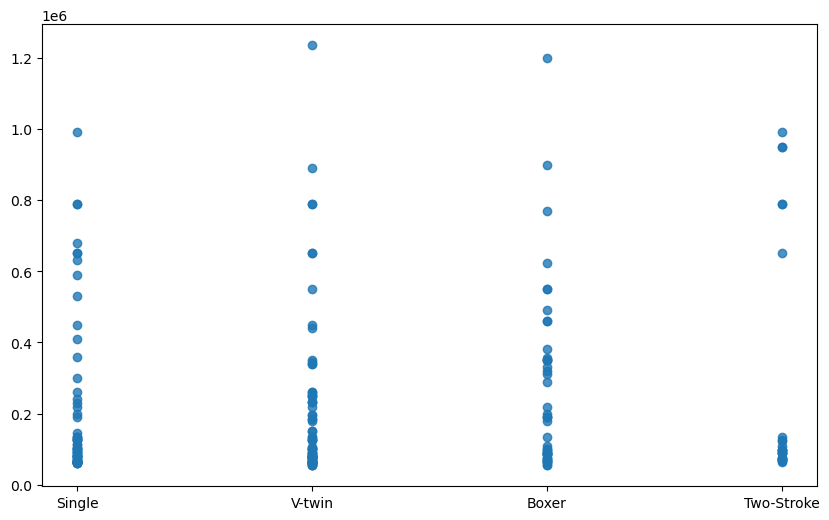

In [284]:
# check for correlation between 'engine_capacity' and 'price'



plt.figure(figsize=(10,6))
sns.regplot(x="Engine_type", y="Price", data=dataTrain)


In [285]:
# A 0.3 correlation is calculated which is very small with a p value of 0. This indicates that even though the correlation is small but its 30% of 100 which is significant hence this feature can be used for predicition.

label_encoder = LabelEncoder()
dataTrain['Engine_type'] = label_encoder.fit_transform(dataTrain['Engine_type'])


pearson_coef, p_value = stats.pearsonr(dataTrain['Engine_type'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


The Pearson Correlation Coefficient is -0.06027381705156112  with a P-value of P = 0.3736154409191692


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

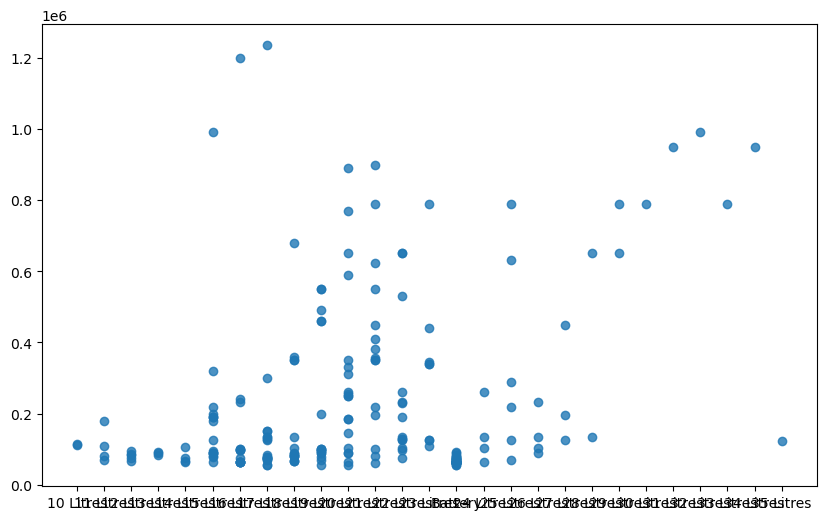

In [286]:
# This regression plot shows an minor positive correlation observed with the help of the best fit line. The calculation will confirm the actual value.

# -----check for correlation between 'number of photos' and 'price'------------



plt.figure(figsize=(10,6))
sns.regplot(x="Fuel_Capacity", y="Price", data=dataTrain)


In [287]:
# The correlation is 0.31 based on the calculation while the p-value calculated is zero. This is similar to the last feature hence the significant 31% of 100 correlation makes this feature eligble for prediction.

label_encoder = LabelEncoder()
dataTrain['Fuel_Capacity'] = label_encoder.fit_transform(dataTrain['Fuel_Capacity'])



pearson_coef, p_value = stats.pearsonr(dataTrain['Fuel_Capacity'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.011181132784081043  with a P-value of P = 0.8690200225204401


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

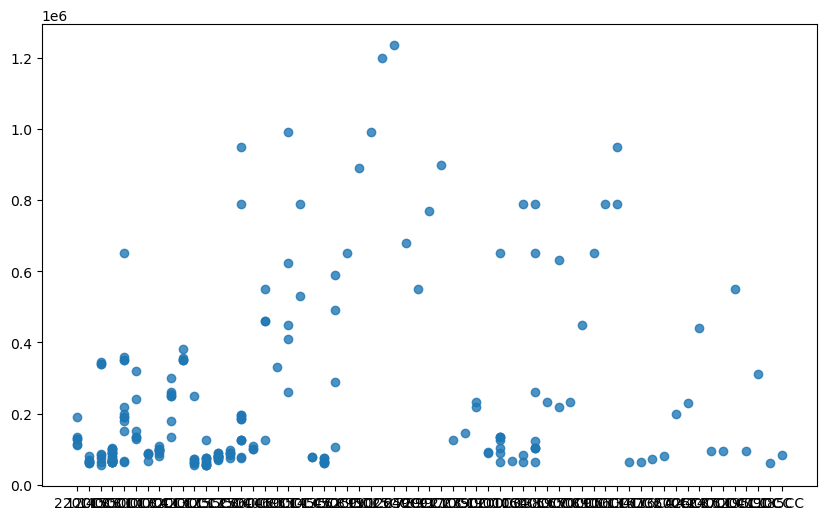

In [288]:
# This plot shows correlation with points all over the graph like the previous feature varibale.

# -------check correlation b/w number of mantenance and price-------------



plt.figure(figsize=(10,6))
sns.regplot(x="Cubic_Capacity", y="Price", data=dataTrain)


In [289]:
# The calculation proves that a correlation is lesser than 0.1 percent and indicates no correlation and the p-value lesser than 0.05 confirms it. This feature is not a critical feature for predicition
# 


label_encoder = LabelEncoder()
dataTrain['Cubic_Capacity'] = label_encoder.fit_transform(dataTrain['Cubic_Capacity'])



pearson_coef, p_value = stats.pearsonr(dataTrain['Cubic_Capacity'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5893368840088222  with a P-value of P = 5.763638834237547e-22


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U11'), dtype('float64')) -> None

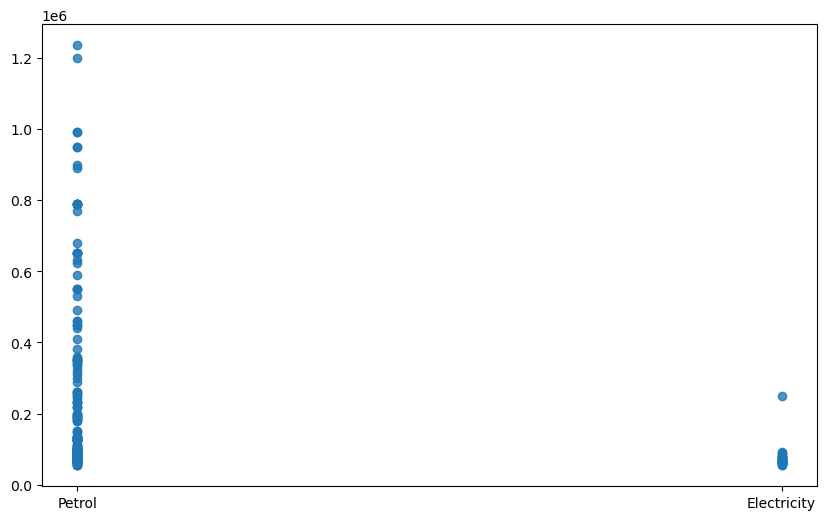

In [290]:
# ---- this plot shows no correlation with points all over the graph ----



plt.figure(figsize=(10,6))
sns.regplot(x="Fuel_type", y="Price", data=dataTrain)


In [291]:
label_encoder = LabelEncoder()
dataTrain['Fuel_type'] = label_encoder.fit_transform(dataTrain['Fuel_type'])



pearson_coef, p_value = stats.pearsonr(dataTrain['Fuel_type'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.27383532278148154  with a P-value of P = 3.830480503559603e-05


<Axes: xlabel='Bike_company', ylabel='Price'>

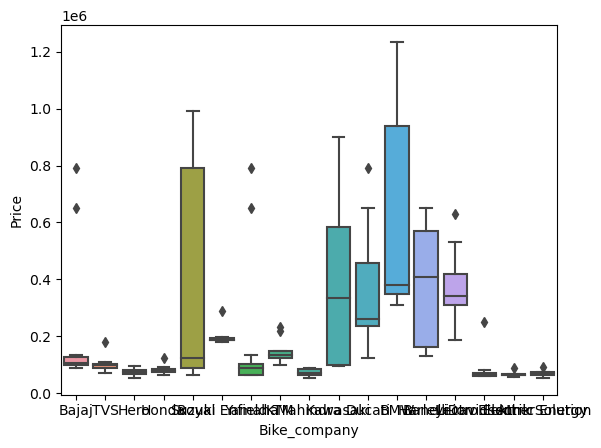

In [292]:
# ### Box Plot
# These plots are used for categorical data to determine the importance of features for prediction. 

# In the given plot below, it is observed that the price range vary for automatic and manual transmisson. This indicates the categories can vary with price hence feature can be used for prediction



sns.boxplot(x="Bike_company", y="Price", data=dataTrain)


<Axes: xlabel='Bike_model', ylabel='Price'>

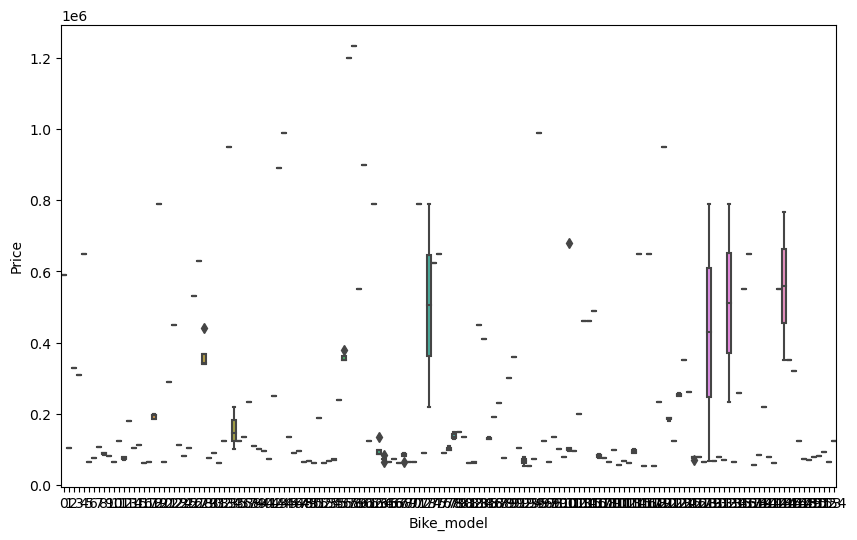

In [293]:
# The box plot shows how prices vary based on different colors. This shows that color can be used as a feature for price prediction.



plt.figure(figsize=(10,6))
sns.boxplot(x="Bike_model", y="Price", data=dataTrain)


<Axes: xlabel='Engine_type', ylabel='Price'>

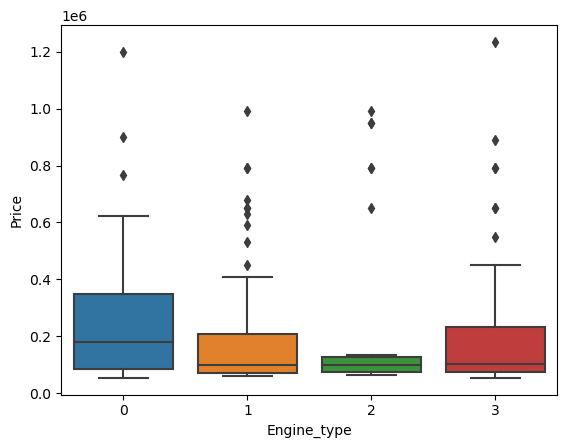

In [294]:

# The engine type (based on fuel type) shows that both categories have almost the same price range which will not bring differences in price when prediction is made. Hence this feature is not suitable for price prediction



sns.boxplot(x="Engine_type", y="Price", data=dataTrain)



<Axes: xlabel='Manufactured_year', ylabel='Price'>

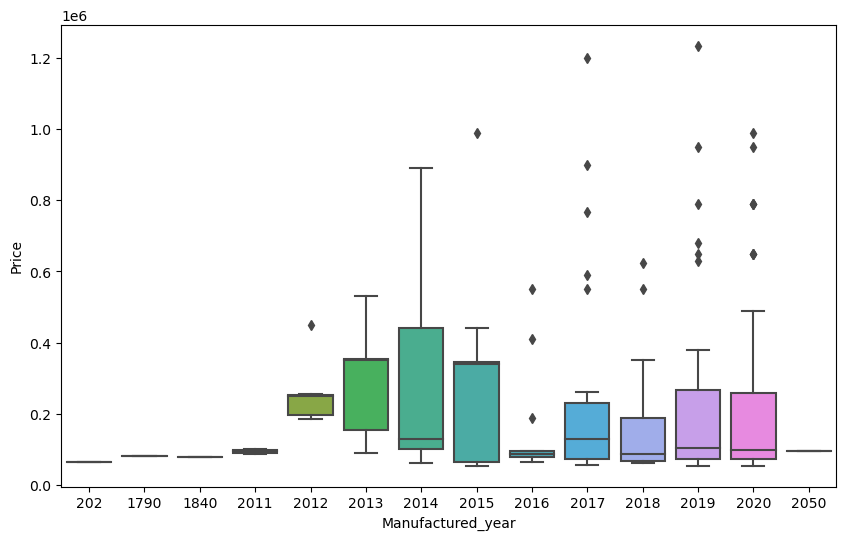

In [295]:
# Thee box plot shows body type categories with varying prices per category hence this feature can be used for price prediction, not so signficant though



plt.figure(figsize=(10,6))
sns.boxplot(x="Manufactured_year", y="Price", data=dataTrain)


<Axes: xlabel='Engine_warranty', ylabel='Price'>

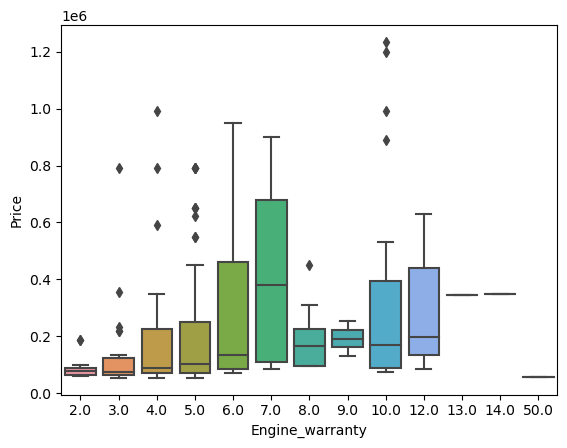

In [296]:
# Has warranty feature shows a huge difference in price ranges between cars with warrant and vice versa. This feature is very important for price prediction as the bigger the difference in range the better the feature.



sns.boxplot(x="Engine_warranty", y="Price", data=dataTrain)


<Axes: xlabel='Fuel_type', ylabel='Price'>

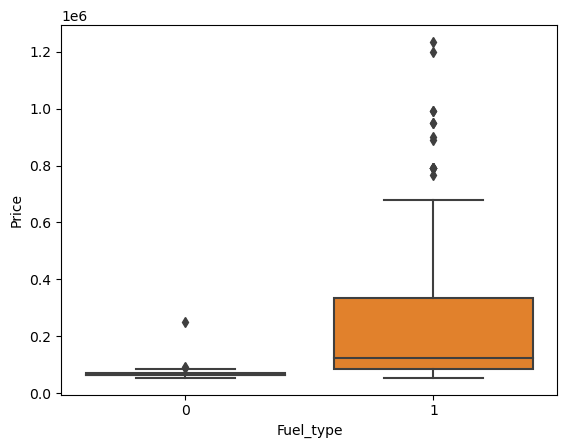

In [297]:

# This feature is similar to the feature above, all three categories have wider price ranges between one another. This feature is also crucial for price prediction.



sns.boxplot(x="Fuel_type", y="Price", data=dataTrain)


<Axes: xlabel='Fuel_Capacity', ylabel='Price'>

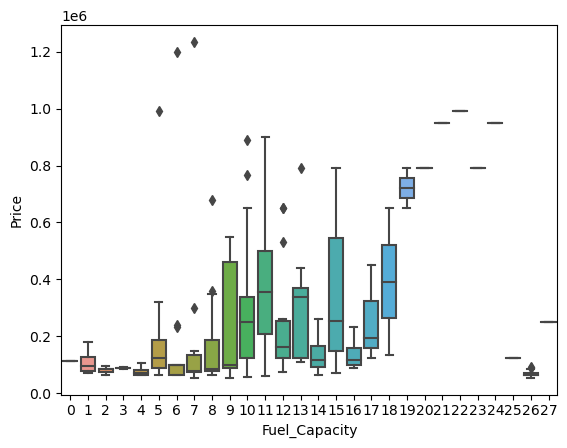

In [298]:

# Front and rear drive have **minimal price difference** while all drive shows a **greater difference** hence the feature can be used for prediction.



sns.boxplot(x="Fuel_Capacity", y="Price", data=dataTrain)


<Axes: xlabel='Cubic_Capacity', ylabel='Price'>

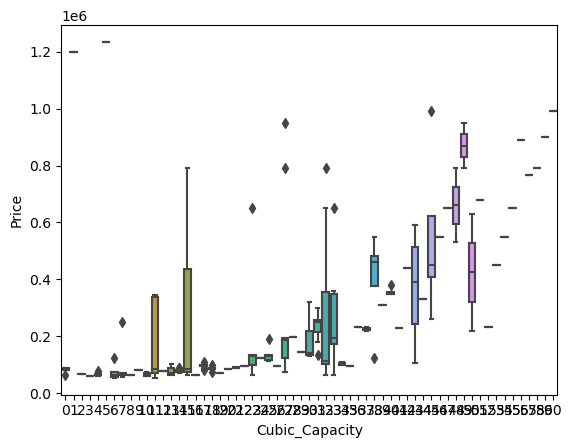

In [299]:

# With not same price range between categories this feature is  suitable for prediction.



sns.boxplot(x="Cubic_Capacity", y="Price", data=dataTrain)


In [300]:
# Using Exploratory data analysis, few features can be dropped because they had no impact on the price prediction. Those features are removed with the function below.(Training set)



dataTrain.drop(['Fuel_Capacity', 'Fuel_type', 'Engine_type','Engine_warranty'], axis = 1, inplace = True)



In [301]:
# Same features are removed for testing set since the data will be used to train the model



dataTest.drop(['Fuel_Capacity', 'Fuel_type', 'Engine_type','Engine_warranty'], axis = 1, inplace = True)


In [302]:
dataTrain.shape

(220, 6)

In [303]:
dataTest.shape

(88, 6)

In [304]:
# ### Data Transformation
# Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data.

# ----Data Preparation--------

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

dataTrain.Cubic_Capacity = labelencoder.fit_transform(dataTrain.Cubic_Capacity)
dataTrain.Bike_company = labelencoder.fit_transform(dataTrain.Bike_company)
dataTrain.Bike_model = labelencoder.fit_transform(dataTrain.Bike_model)
dataTrain.Manufactured_year = labelencoder.fit_transform(dataTrain.Manufactured_year)


In [305]:
# Label encoding of all categorical data in the testing set.


labelencoder = LabelEncoder()

dataTest.Cubic_Capacity = labelencoder.fit_transform(dataTest.Cubic_Capacity)
dataTest.Bike_company = labelencoder.fit_transform(dataTest.Bike_company)
dataTest.Bike_model = labelencoder.fit_transform(dataTest.Bike_model)
dataTest.Manufactured_year = labelencoder.fit_transform(dataTest.Manufactured_year)


In [306]:
# Checking on the remaining features and if label encoding is applied to all categorical features (Training set).



dataTrain.head(10)


,S.no,Bike_company,Bike_model,Manufactured_year,Cubic_Capacity,Price
0,1,2,15,12,25,113000
1,2,15,12,12,4,70000
2,3,6,107,12,11,85000
3,4,7,8,12,13,90000
4,5,14,5,12,33,65000
5,6,13,121,11,33,180000
6,7,16,48,10,13,65000
7,8,8,78,9,30,150000
8,9,12,68,8,0,89000
9,10,9,101,3,17,99999


In [307]:
# Check on the remaining features and application of label encoding to all categorical features (Testing set).



dataTest.head(10)


,S.no,Bike_company,Bike_model,Manufactured_year,Cubic_Capacity,Price
0,1,17,31,4,14,97999
1,2,16,13,0,22,195999
2,3,20,26,4,26,190000
3,4,10,25,4,25,199999
4,5,12,45,4,18,155000
5,6,11,83,4,28,390000
6,7,5,53,4,23,359999
7,8,1,0,4,29,320000
8,9,2,41,4,30,439090
9,10,6,24,4,33,629999


In [311]:
# Dividing the data for training and testing accordingly. X takes the all features while Y takes the target variable
# 
# We have 13 actual columns [0-12 index]; 12 are predictor variables and 1 is the target variable



x_train=dataTrain.iloc[:,0:4]
y_train=dataTrain.iloc[:,5]
x_test=dataTest.iloc[:,0:4]
y_test=dataTest.iloc[:,5]


In [312]:
x_train.head()

,S.no,Bike_company,Bike_model,Manufactured_year
0,1,2,15,12
1,2,15,12,12
2,3,6,107,12
3,4,7,8,12
4,5,14,5,12


In [313]:
y_train.head()

0    113000
1     70000
2     85000
3     90000
4     65000
Name: Price, dtype: int64

In [314]:
# ## Fit Model
# ### Multiple Linear Regression
# Calling multiple linear regression model and fitting the training set



from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)



In [315]:
# Making price prediction using the testing set (Fit to MLR)

y_pred1 = model_mlr.predict(x_test)

In [316]:


#randomly checking the y-test values 
y_test[0]


97999

In [317]:

#randomly checking the y-pred values 
y_pred1[0]


169304.99286354537

In [318]:

# y_test[0]   and   y_pred1[0]   have different values.. In other words, there is error

# ### MLR Evaluation
# 

# Calculating the Mean Square Error for MLR model



mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)


The mean square error for Multiple Linear Regression:  185341701242.44547


In [319]:
# Calculating the Mean Absolute Error for MLR model


mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)



The mean absolute error for Multiple Linear Regression:  273522.70879595185


In [320]:

# ### Random Forest Regressor (checking other Models)
# Calling the random forest model and fitting the training data



rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)


In [321]:
# Prediction of car prices using the testing data



y_pred2 = model_rf.predict(x_test)



In [322]:

# ### Random Forest Evaluation
# 

# Calculating the Mean Square Error for Random Forest Model (Lowest MSE value)



mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)



The mean square error of price and predicted value is:  224731603525.6005


In [323]:
# Calculating the Mean Absolute Error for Random Forest Model (Lowest Mean Absolute Error)



mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)


The mean absolute error of price and predicted value is:  333330.50909090904


In [324]:
# ### LASSO Model 
# Calling the model and fitting the training data



LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)


In [325]:
# Price prediction uisng testing data



y_pred3 = model_lm.predict(x_test)


In [326]:
# ### LASSO Evaluation  (checking another model)
# 

# Mean Absolute Error for LASSO Model



mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)


The mean absolute error of price and predicted value is:  273522.7154808354


In [327]:
# Mean Squared Error for the LASSO Model


mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)


The mean square error of price and predicted value is:  185341306751.981


In [328]:


scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]         



In [329]:


mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae


,Model,MAE Score
0,MLR,273522.708796
1,Random Forest,333330.509091
2,LASSO,273522.715481


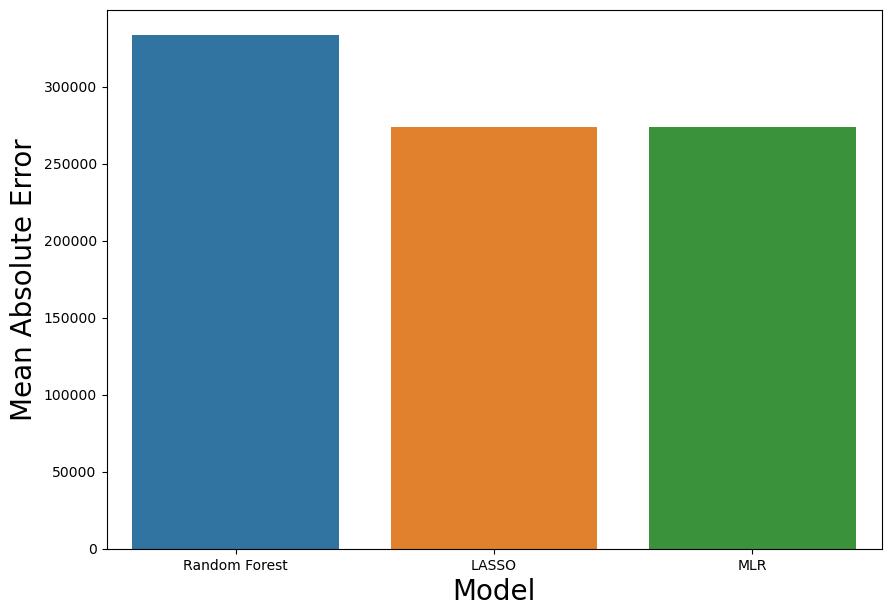

In [330]:

mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()
